In [1]:
import os 
os.chdir("../")
import numpy as np
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(5, 5)
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.figdir = '../figures'
#results_file = './write/results.h5ad'


%load_ext autoreload
%autoreload 2 

/home/icb/carlo.dedonno/anaconda3/envs/tf2/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.16.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [2]:
adata = sc.read('./data/processed/sciplex3processed.h5ad')
del adata.raw

# QC

In [3]:
# Quality control - calculate QC covariates
# adata.X = adata.X.toarray()
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

Trying to set attribute `.uns` of view, copying.


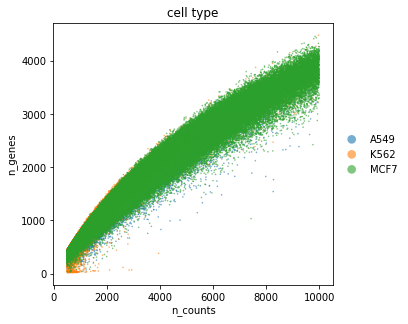

In [4]:
#Data quality summary plots
#plt.rcParams['figure.figsize'] = (10, 10)
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='cell_type', size=10, alpha=0.6)

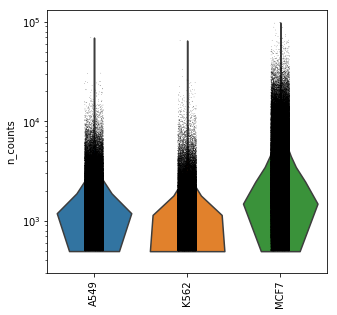

In [5]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='cell_type', size=0.5, log=True, cut=0, rotation=90)
#t2 = sc.pl.violin(adata, 'mt_frac', groupby='sample')

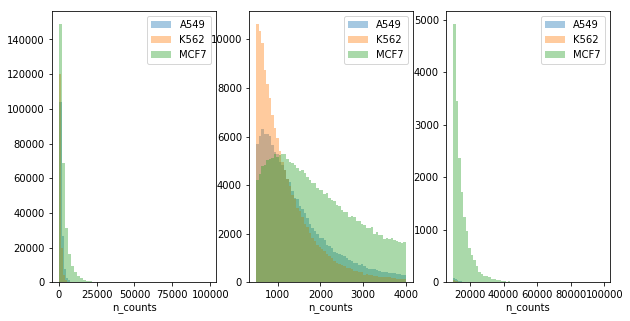

In [6]:
#Thresholding decision: counts
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='A549'], kde=False, ax=ax[0])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='K562'], kde=False, ax=ax[0])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='MCF7'], kde=False, ax=ax[0])
ax[0].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='A549']\
                  [adata.obs['n_counts']<4000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='K562']\
                  [adata.obs['n_counts']<4000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='MCF7']\
                  [adata.obs['n_counts']<4000], kde=False, bins=60, ax=ax[1])
ax[1].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='A549']\
                  [adata.obs['n_counts']>10000], kde=False, bins=60, ax=ax[2])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='K562']\
                  [adata.obs['n_counts']>10000], kde=False, bins=60, ax=ax[2])
sns.distplot(adata.obs['n_counts'][adata.obs['cell_type']=='MCF7']\
                  [adata.obs['n_counts']>10000], kde=False, bins=60, ax=ax[2])
ax[2].legend(['A549', 'K562', 'MCF7'])


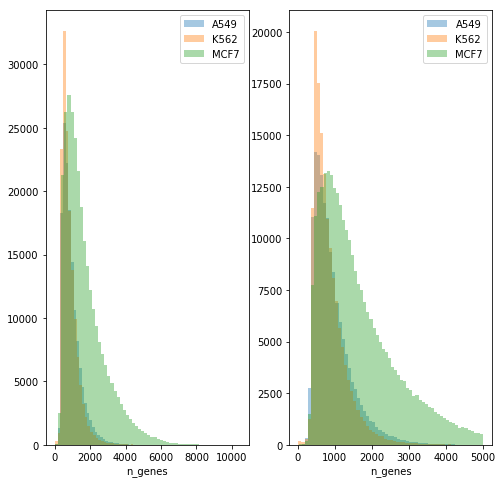

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7'], kde=False, bins=60, ax=ax[0])
ax[0].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549']\
             [adata.obs['n_genes']<5000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562']\
             [adata.obs['n_genes']<5000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7']\
             [adata.obs['n_genes']<5000], kde=False, bins=60, ax=ax[1])
ax[1].legend(['A549', 'K562', 'MCF7'])

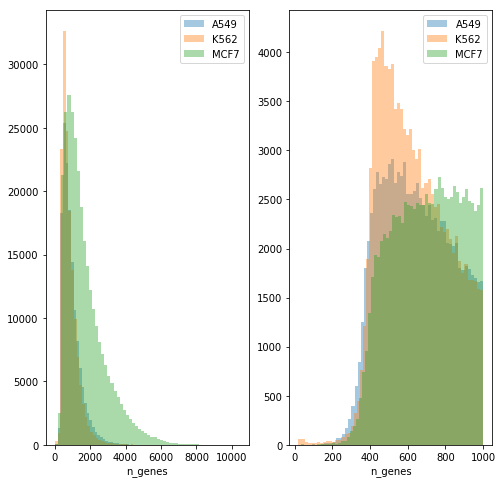

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8))
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562'], kde=False, bins=60, ax=ax[0])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7'], kde=False, bins=60, ax=ax[0])
ax[0].legend(['A549', 'K562', 'MCF7'])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='A549']\
             [adata.obs['n_genes']<1000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='K562']\
             [adata.obs['n_genes']<1000], kde=False, bins=60, ax=ax[1])
sns.distplot(adata.obs['n_genes'][adata.obs['cell_type']=='MCF7']\
             [adata.obs['n_genes']<1000], kde=False, bins=60, ax=ax[1])
ax[1].legend(['A549', 'K562', 'MCF7'])

In [9]:
print('Total number of genes: {:d}'.format(adata.n_vars))

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=50)
print('Number of genes after cell filter: {:d}'.format(adata.n_vars))

Total number of genes: 58347
filtered out 27520 genes that are detected in less than 50 cells
Number of genes after cell filter: 30827


(array([1165.,  938.,  733.,  639.,  558.,  513.,  463.,  396.,  328.,
         344.]),
 array([ 50. ,  64.9,  79.8,  94.7, 109.6, 124.5, 139.4, 154.3, 169.2,
        184.1, 199. ]),
 <a list of 10 Patch objects>)

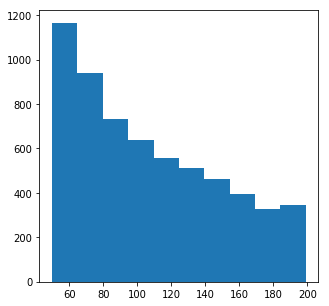

In [10]:
plt.hist(adata.var['n_cells'][adata.var['n_cells']<200])

# Normalization

In [11]:
#Keep the count data in a counts layer
adata.layers["counts"] = adata.X.copy()

In [12]:
from scipy.sparse import csr_matrix

r,c = adata.X.nonzero()
rD_sp = csr_matrix(((1.0/adata.obs['size_factor'].values)[r], (r,c)), shape=(adata.X.shape))
adata.X = adata.X.multiply(rD_sp)

In [13]:
#Normalize adata 
#adata.X /= adata.obs['size_factor'].values[:,None]
sc.pp.log1p(adata)

In [14]:
# Store the full data set in 'raw' as log-normalised data for statistical testing
adata.raw = adata

# HVG

In [15]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=7000, subset=True)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 6999


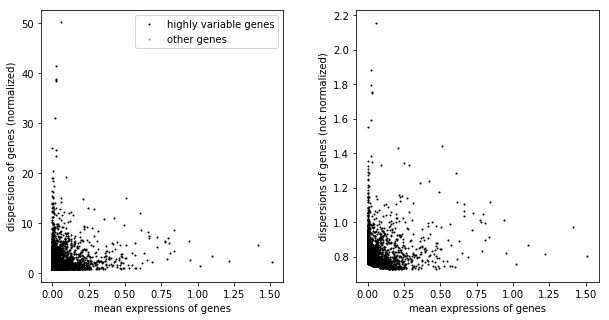

In [16]:
sc.pl.highly_variable_genes(adata)

# Find most effective drugs

In [17]:
sc.tl.rank_genes_groups(adata, use_raw=False, groupby='product_name', reference='Vehicle', key_added='rank_genes_product')

ranking genes
    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


In [18]:
pvals_stack = pd.DataFrame.from_records(adata.uns['rank_genes_product']['pvals_adj']).stack().reset_index()

In [19]:
pvals_stack['significant'] = (pvals_stack[0] < 0.001)

In [20]:
pvals_sign = pd.DataFrame({'product': pvals_stack['level_1'].unique(), 'ndeg': pvals_stack.groupby('level_1')['significant'].sum()})
pvals_sign = pvals_sign.sort_values(['ndeg'], ascending=False).reset_index(drop=True)

[Text(0, 0, '2-Methoxyestradiol (2-MeOE2)'),
 Text(0, 0, 'CUDC-101'),
 Text(0, 0, 'Trametinib (GSK1120212)'),
 Text(0, 0, 'PFI-1 (PF-6405761)'),
 Text(0, 0, 'Givinostat (ITF2357)'),
 Text(0, 0, 'Pracinostat (SB939)'),
 Text(0, 0, 'Belinostat (PXD101)'),
 Text(0, 0, 'Tacedinaline (CI994)'),
 Text(0, 0, 'Panobinostat (LBH589)'),
 Text(0, 0, 'CUDC-907'),
 Text(0, 0, 'Trichostatin A (TSA)'),
 Text(0, 0, 'GSK-LSD1 2HCl'),
 Text(0, 0, 'Fulvestrant'),
 Text(0, 0, 'Dacinostat (LAQ824)'),
 Text(0, 0, 'Dasatinib'),
 Text(0, 0, 'Entinostat (MS-275)'),
 Text(0, 0, 'Resminostat'),
 Text(0, 0, 'Raltitrexed'),
 Text(0, 0, 'Triamcinolone Acetonide'),
 Text(0, 0, 'Tanespimycin (17-AAG)'),
 Text(0, 0, 'Quisinostat (JNJ-26481585) 2HCl'),
 Text(0, 0, 'M344'),
 Text(0, 0, 'AR-42'),
 Text(0, 0, 'Abexinostat (PCI-24781)'),
 Text(0, 0, 'Luminespib (AUY-922, NVP-AUY922)'),
 Text(0, 0, 'Mocetinostat (MGCD0103)'),
 Text(0, 0, 'YM155 (Sepantronium Bromide)'),
 Text(0, 0, 'Hesperadin'),
 Text(0, 0, 'Alvespimycin (

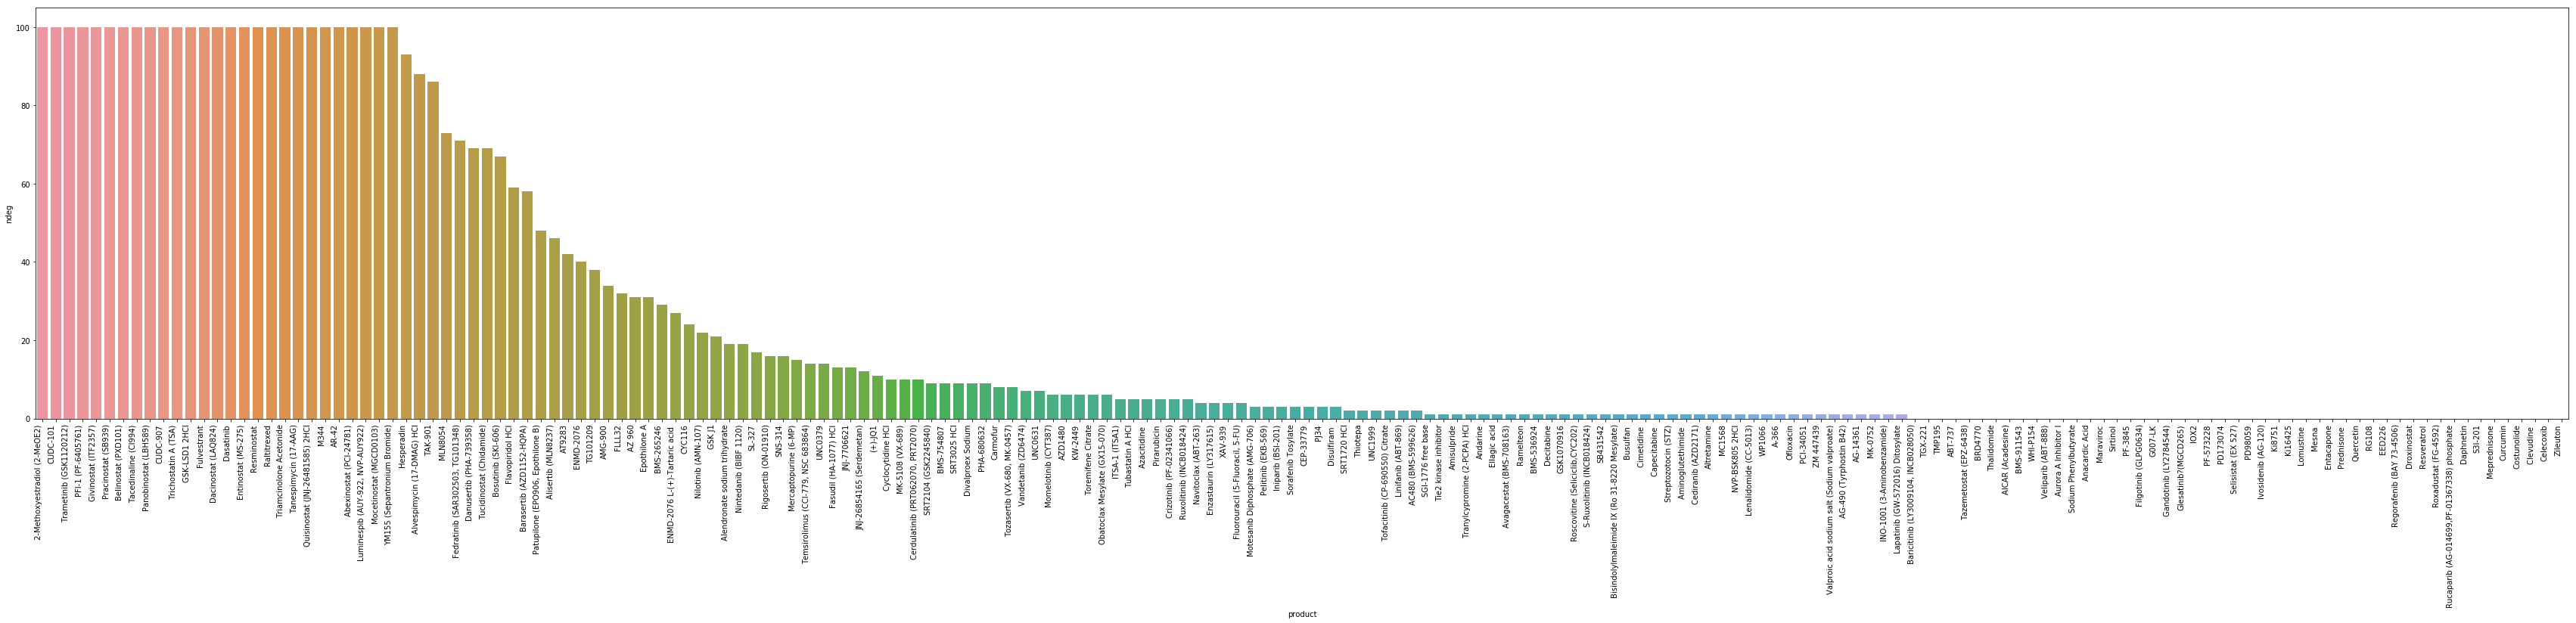

In [21]:
plt.rcParams['figure.figsize'] = (60, 10)
plot = sns.barplot(x='product', y='ndeg', data=pvals_sign)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

In [22]:
effective_drugs = list(pvals_sign['product'][pvals_sign['ndeg']>20])

In [23]:
effective_drugs.append('Vehicle')

In [24]:
adata_eff = adata[adata.obs['product_name'].isin(effective_drugs)]

In [25]:
adata_eff

View of AnnData object with n_obs × n_vars = 147765 × 6999 
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_counts', 'log_counts', 'n_genes'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'rank_genes_product'
    layers: 'counts'

# Check most effective drugs per cell line

A549
ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
K562
ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
MCF7
ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_product']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


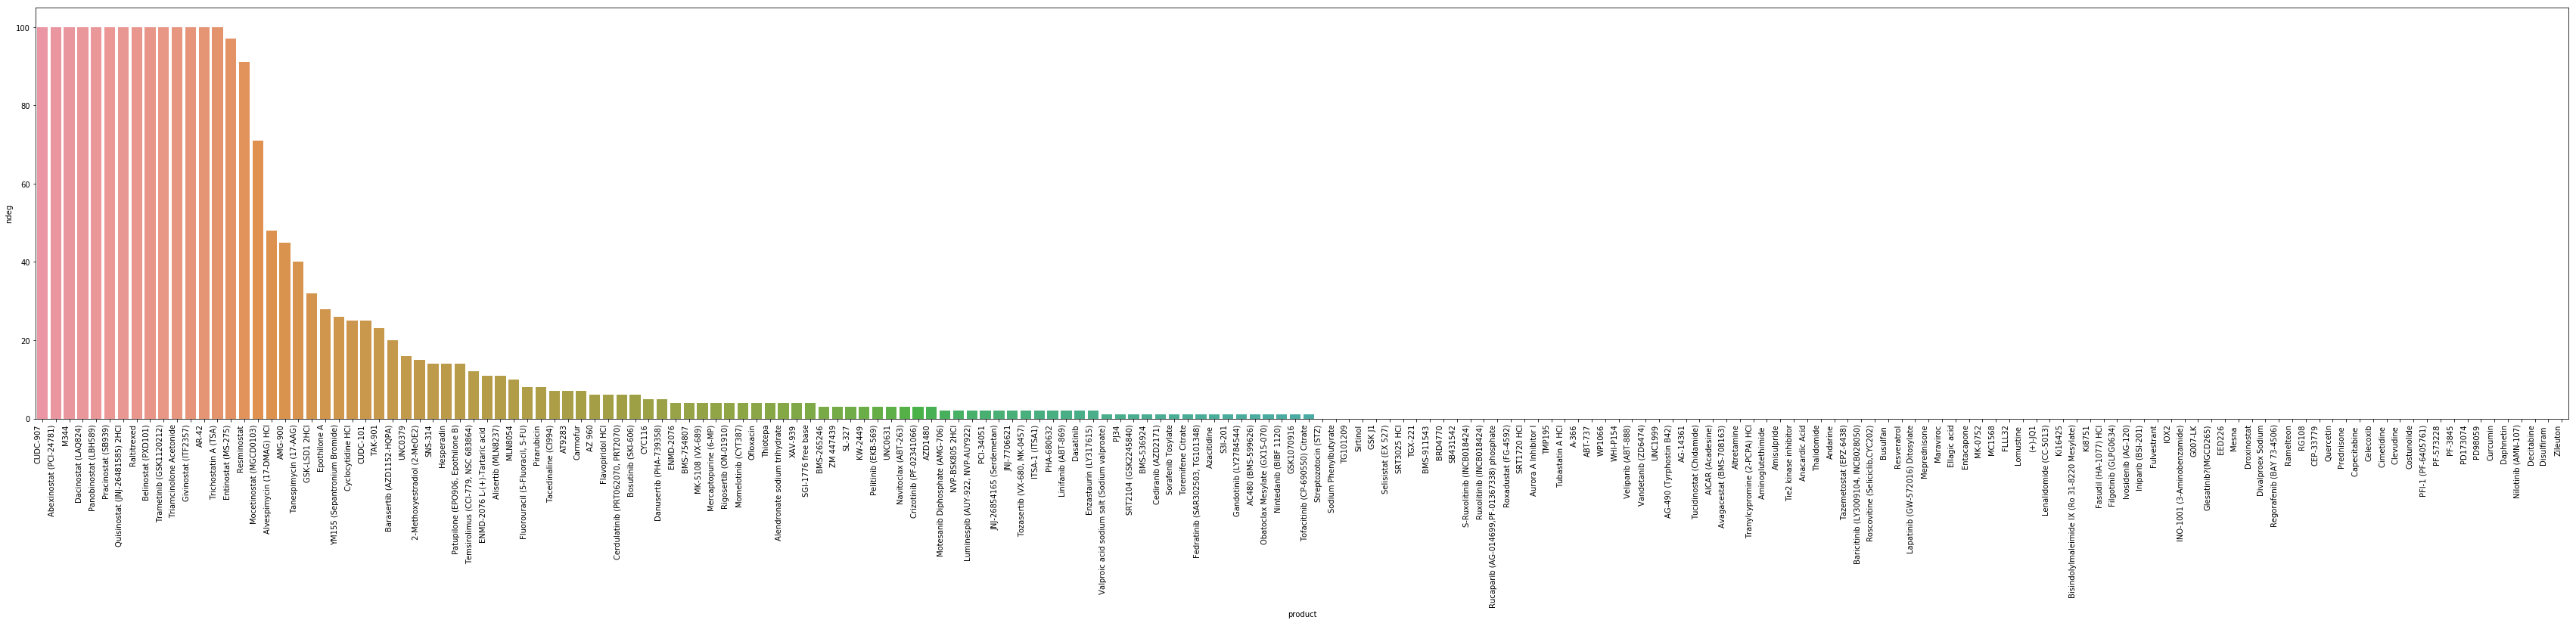

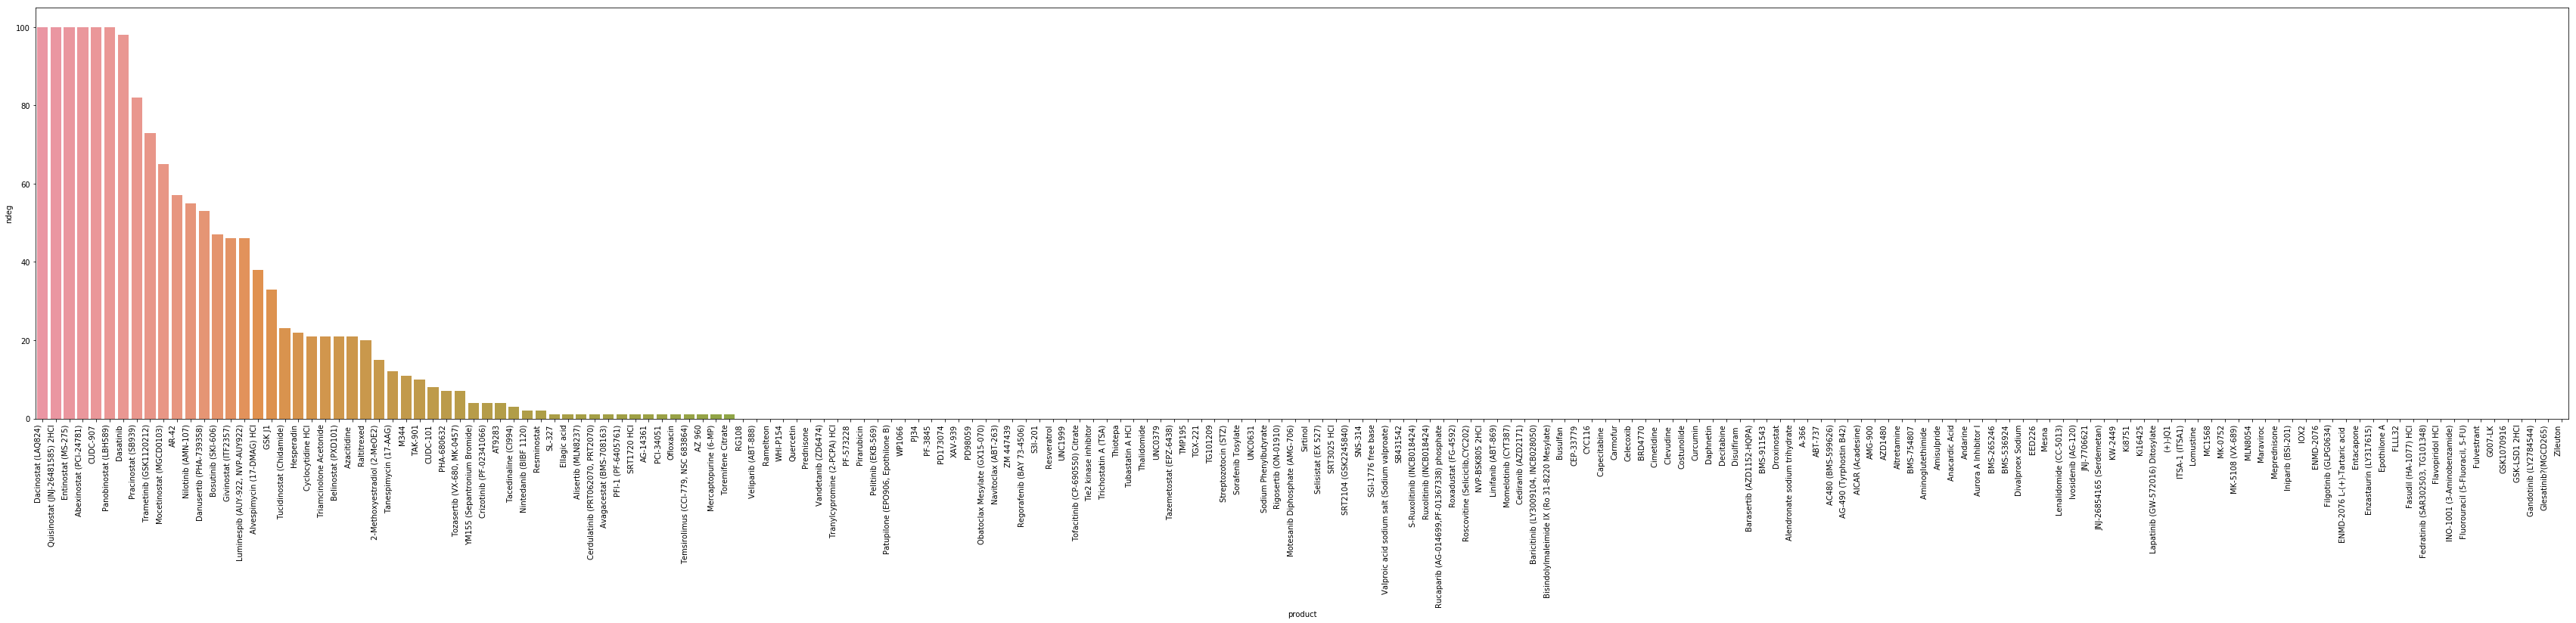

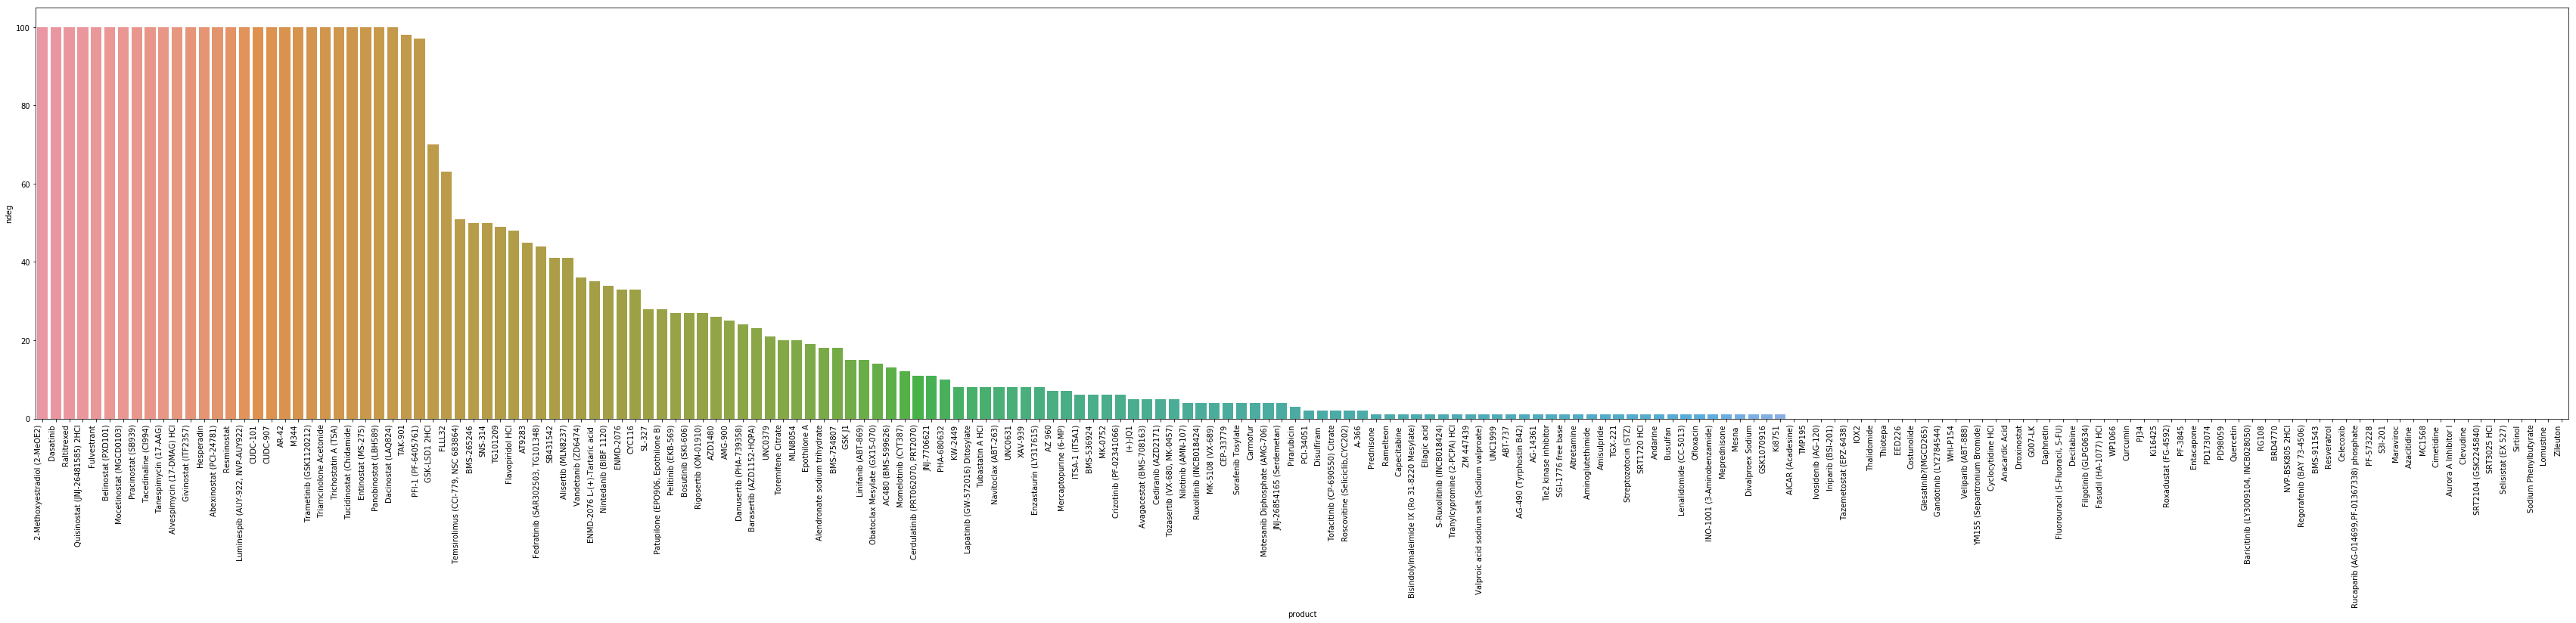

In [26]:
effective_drugs_cell = dict()
for cell_type in list(adata.obs['cell_type'].cat.categories):
    print(cell_type)
    adata_cell = adata[adata.obs['cell_type']==cell_type]
    sc.tl.rank_genes_groups(adata_cell, use_raw=False, groupby='product_name', reference='Vehicle', key_added='rank_genes_product')
    pvals_stack = pd.DataFrame.from_records(adata_cell.uns['rank_genes_product']['pvals_adj']).stack().reset_index()
    pvals_stack['significant'] = (pvals_stack[0] < 0.01)
    pvals_sign = pd.DataFrame({'product': pvals_stack['level_1'].unique(), 'ndeg': pvals_stack.groupby('level_1')['significant'].sum()})
    pvals_sign = pvals_sign.sort_values(['ndeg'], ascending=False).reset_index(drop=True)
    effective_drugs_cell[cell_type] = list(pvals_sign['product'][pvals_sign['ndeg']>20])
    effective_drugs_cell[cell_type].append('Vehicle')
    
    plt.rcParams['figure.figsize'] = (60, 10)
    plt.figure()
    plot = sns.barplot(x='product', y='ndeg', data=pvals_sign)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

In [27]:
effective_drugs_intersection = list(set(effective_drugs_cell['A549']).intersection(set(effective_drugs_cell['K562']), set(effective_drugs_cell['MCF7'])))
effective_drugs_union = list(set(effective_drugs_cell['A549']).union(set(effective_drugs_cell['K562']), set(effective_drugs_cell['MCF7'])))

In [28]:
effective_drugs_cell

{'A549': ['CUDC-907',
  'Abexinostat (PCI-24781)',
  'M344',
  'Dacinostat (LAQ824)',
  'Panobinostat (LBH589)',
  'Pracinostat (SB939)',
  'Quisinostat (JNJ-26481585) 2HCl',
  'Raltitrexed',
  'Belinostat (PXD101)',
  'Trametinib (GSK1120212)',
  'Triamcinolone Acetonide',
  'Givinostat (ITF2357)',
  'AR-42',
  'Trichostatin A (TSA)',
  'Entinostat (MS-275)',
  'Resminostat',
  'Mocetinostat (MGCD0103)',
  'Alvespimycin (17-DMAG) HCl',
  'AMG-900',
  'Tanespimycin (17-AAG)',
  'GSK-LSD1 2HCl',
  'Epothilone A',
  'YM155 (Sepantronium Bromide)',
  'Cyclocytidine HCl',
  'CUDC-101',
  'TAK-901',
  'Vehicle'],
 'K562': ['Dacinostat (LAQ824)',
  'Quisinostat (JNJ-26481585) 2HCl',
  'Entinostat (MS-275)',
  'Abexinostat (PCI-24781)',
  'CUDC-907',
  'Panobinostat (LBH589)',
  'Dasatinib',
  'Pracinostat (SB939)',
  'Trametinib (GSK1120212)',
  'Mocetinostat (MGCD0103)',
  'AR-42',
  'Nilotinib (AMN-107)',
  'Danusertib (PHA-739358)',
  'Bosutinib (SKI-606)',
  'Givinostat (ITF2357)',
  'Lu

In [29]:
adatas_cell = []
for cell_type, _ in effective_drugs_cell.items():
    adatas_cell.append(adata[(adata.obs['cell_type'] == cell_type) & (adata.obs['product_name'].isin(effective_drugs_cell[cell_type]))])
adata_eff_cell = adatas_cell[0].concatenate(adatas_cell[1:])
del adatas_cell

adata_eff_intersection = adata[adata.obs['product_name'].isin(effective_drugs_intersection)]
adata_eff_union = adata[adata.obs['product_name'].isin(effective_drugs_union)]

In [30]:
sc.pp.neighbors(adata_eff_cell)
sc.tl.umap(adata_eff_cell)
sc.pp.neighbors(adata_eff_intersection)
sc.tl.umap(adata_eff_intersection)
sc.pp.neighbors(adata_eff_union)
sc.tl.umap(adata_eff_union)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:01:58)


/app/python37/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../app/python37/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/app/python37/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../app/python37/lib/python3.7/site-packages/umap/util

    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:02:44)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:23)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:00:49)


/app/python37/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../app/python37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:01:05)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:48)
computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:02:54)


/app/python37/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../app/python37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:03:59)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:49)


... storing 'cell_type' as categorical
... storing 'pathway' as categorical
... storing 'pathway_level_1' as categorical
... storing 'pathway_level_2' as categorical
... storing 'product_dose' as categorical
... storing 'product_name' as categorical
... storing 'target' as categorical


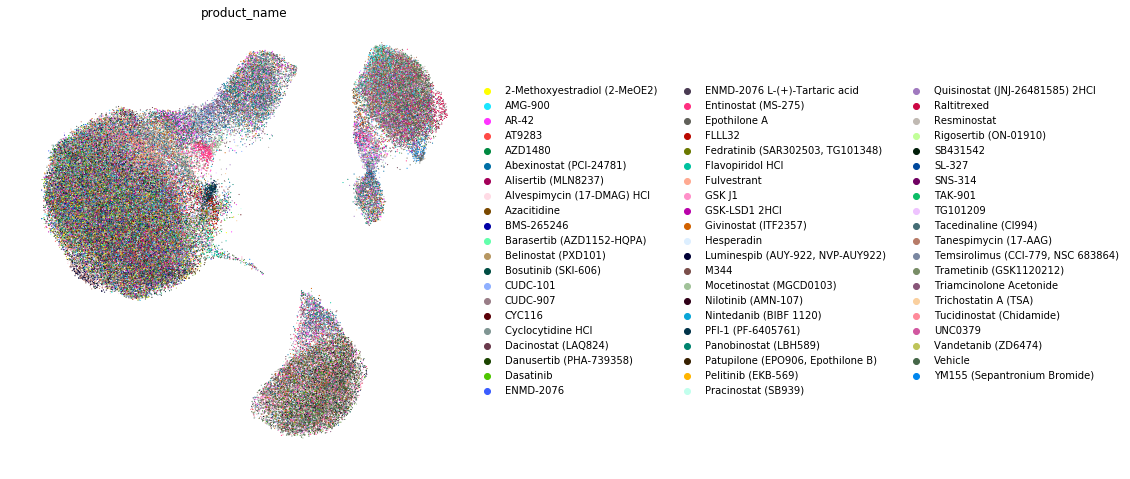

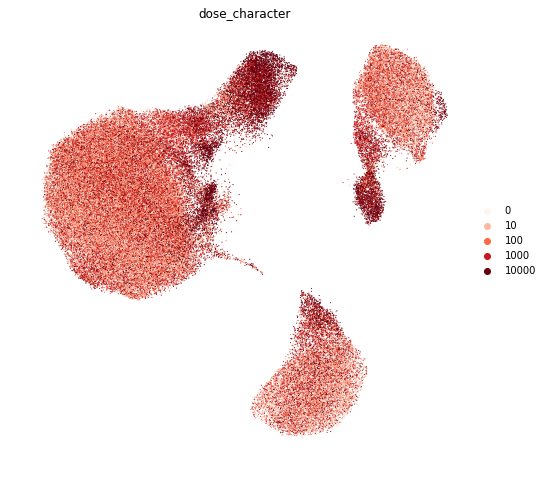

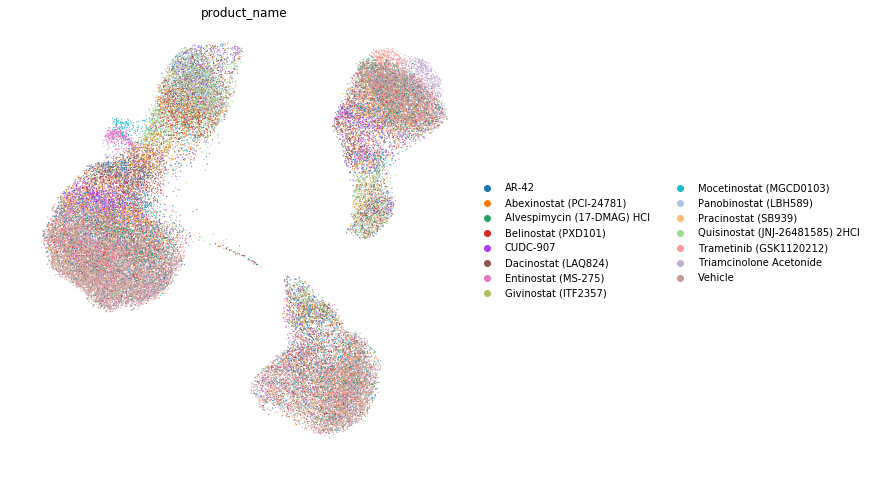

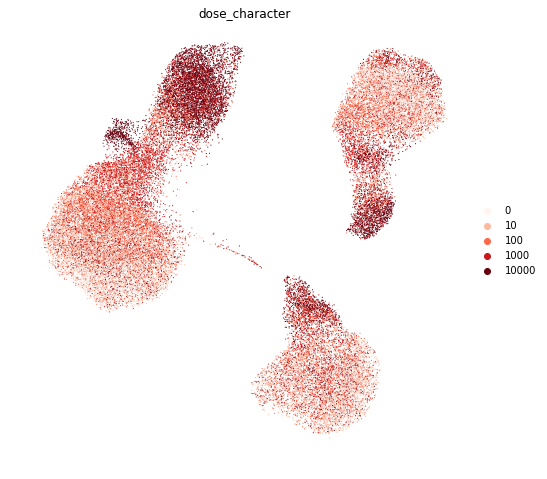

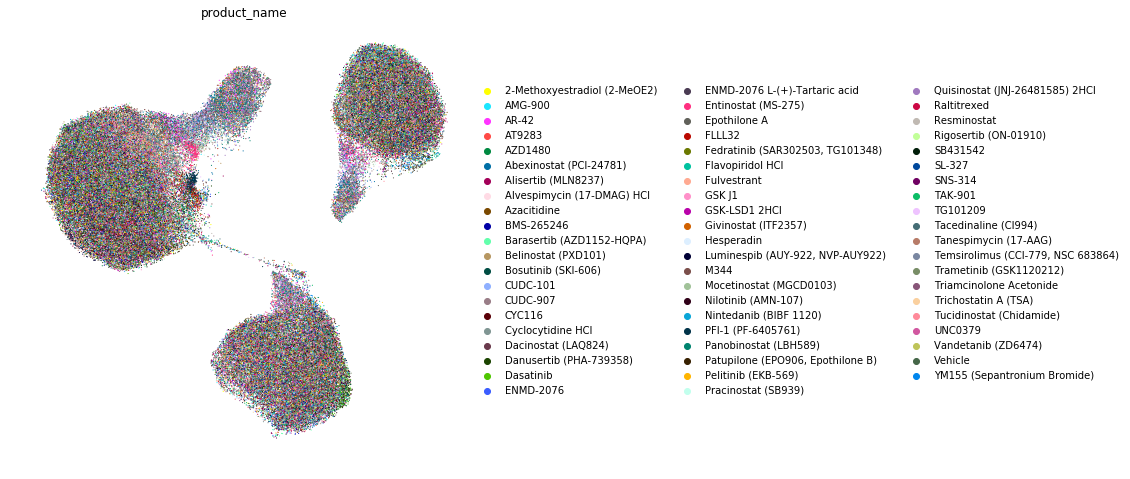

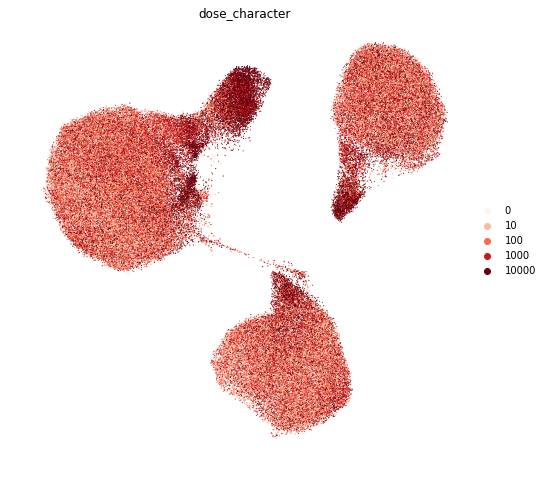

In [31]:
plt.rcParams['figure.figsize'] = (8, 8)
sc.pl.umap(adata_eff_cell, size=5, color='product_name', frameon=False)
sc.pl.umap(adata_eff_cell, size=5, color='dose_character', palette='Reds', frameon=False)
sc.pl.umap(adata_eff_intersection, size=5, color='product_name', frameon=False)
sc.pl.umap(adata_eff_intersection, size=5, color='dose_character', palette='Reds', frameon=False)
sc.pl.umap(adata_eff_union, size=5, color='product_name', frameon=False)
sc.pl.umap(adata_eff_union, size=5, color='dose_character', palette='Reds', frameon=False)

In [3]:
import trvae

Using TensorFlow backend.


In [4]:
import tensorflow
print(trvae.__version__)
print(tensorflow.__version__)

1.0.1.dev27+97e3d65.dirty
2.1.0


In [5]:
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [6]:
condition_key = "product_name"
cell_type_key = "cell_type"

In [7]:
adata_trvae = adata[adata.obs['eff_intersection']].copy()

In [8]:
train_adata, valid_adata = trvae.tl.train_test_split(adata_trvae, train_frac=0.80)

In [9]:
net_train_adata = train_adata[~((train_adata.obs[condition_key] == 'Panobinostat (LBH589)') & (train_adata.obs[cell_type_key] == 'A549'))]
net_valid_adata = valid_adata[~((valid_adata.obs[condition_key] == 'Panobinostat (LBH589)') & (valid_adata.obs[cell_type_key] == 'A549'))]

In [10]:
print(train_adata.shape, valid_adata.shape)
print(net_train_adata.shape, net_valid_adata.shape)

(40800, 6999) (10201, 6999)
(40369, 6999) (10089, 6999)


In [11]:
n_conditions = len(train_adata.obs[condition_key].unique().tolist())

In [12]:
conditions = adata_trvae.obs[condition_key].unique().tolist()
condition_encoder = trvae.tl.create_dictionary(conditions, [])
condition_encoder

{'Vehicle': 0,
 'Quisinostat (JNJ-26481585) 2HCl': 1,
 'Panobinostat (LBH589)': 2,
 'Alvespimycin (17-DMAG) HCl': 3,
 'Trametinib (GSK1120212)': 4,
 'Triamcinolone Acetonide': 5,
 'Belinostat (PXD101)': 6,
 'AR-42': 7,
 'Dacinostat (LAQ824)': 8,
 'Abexinostat (PCI-24781)': 9,
 'Mocetinostat (MGCD0103)': 10,
 'Pracinostat (SB939)': 11,
 'Entinostat (MS-275)': 12,
 'CUDC-907': 13,
 'Givinostat (ITF2357)': 14}

In [13]:
network = trvae.archs.trVAE(x_dimension=train_adata.shape[1],
                            architecture=[128, 32],
                            z_dimension=10,
                            n_conditions=n_conditions,
                            output_activation='relu')

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 6999)         0                                            
__________________________________________________________________________________________________
encoder_labels (InputLayer)     (None, 15)           0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 7014)         0           data[0][0]                       
                                                                 encoder_labels[0][0]             
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          897920      concatenate_1[0][0]        

In [ ]:
network.train(net_train_adata,
              net_valid_adata,
              condition_encoder,
              condition_key,
              n_epochs=1000,
              batch_size=1024,
              verbose=5,
              early_stop_limit=750,
              lr_reducer=0,
              shuffle=True,
              )

 |█-------------------| 5.0%  - loss: 7722.6479 - kl_sse_loss: 7693.0908 - mmd_loss: 25.7010 - val_loss: 7616.6132 - val_kl_sse_loss: 7589.3008 - val_mmd_loss: 26.44685935

/home/icb/carlo.dedonno/anaconda3/envs/tf2/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


 |████████------------| 40.9%  - loss: 7643.2984 - kl_sse_loss: 7631.3179 - mmd_loss: 15.0843 - val_loss: 7544.6104 - val_kl_sse_loss: 7528.5146 - val_mmd_loss: 15.2442

In [55]:
train_labels, _ = trvae.tl.label_encoder(net_train_adata, condition_encoder, condition_key)
latent_with_true_labels = network.to_latent(net_train_adata, train_labels)
mmd_with_true_labels = network.to_mmd_layer(net_train_adata, train_labels, feed_fake=-1)

computing neighbors
    using data matrix X directly


/home/icb/carlo.dedonno/anaconda3/envs/tf2/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf2/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:37)


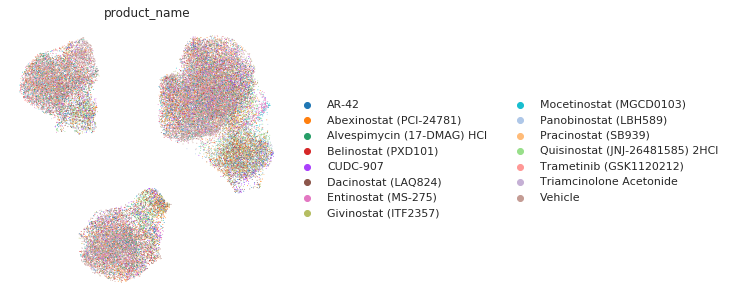

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


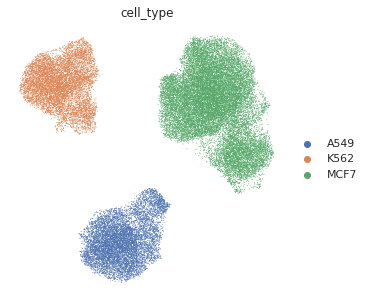

In [57]:
sc.pp.neighbors(latent_with_true_labels)
sc.tl.umap(latent_with_true_labels)
sc.pl.umap(latent_with_true_labels, color=[condition_key],
           show=True,
           wspace=0.5,
           frameon=False)
sc.pl.umap(latent_with_true_labels, color=[cell_type_key],
           show=True,
           wspace=0.5,
           frameon=False)

computing neighbors
    using data matrix X directly


/home/icb/carlo.dedonno/anaconda3/envs/tf2/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf2/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:36)


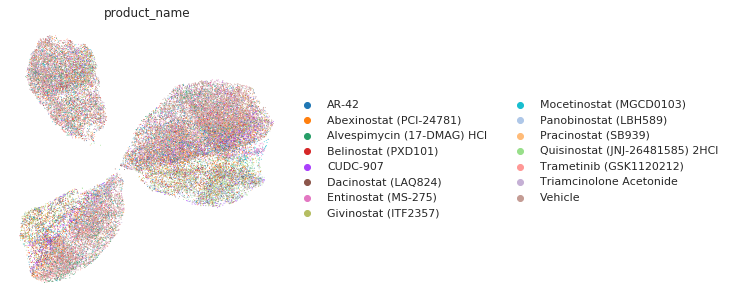

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


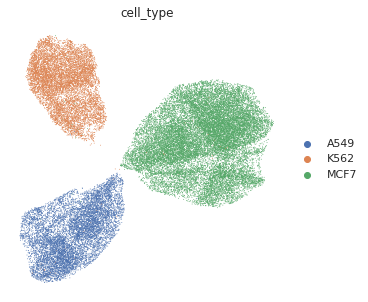

In [59]:
sc.pp.neighbors(mmd_with_true_labels)
sc.tl.umap(mmd_with_true_labels)
sc.pl.umap(mmd_with_true_labels, color=[condition_key],
           show=True,
           wspace=0.5,
           frameon=False)
sc.pl.umap(mmd_with_true_labels, color=[cell_type_key],
           show=True,
           wspace=0.5,
           frameon=False)

In [61]:
def predict_transition(adata, source_cond, target_cond):
    
    source_adata = adata[adata.obs[condition_key] == source_cond]
    
    source_cond_key = source_cond.split("_to_")[-1]
    source_labels = np.zeros(source_adata.shape[0]) + condition_encoder[source_cond_key]
    target_labels = np.zeros(source_adata.shape[0]) + condition_encoder[target_cond]

    pred_target = network.predict(source_adata,
                                  encoder_labels=source_labels,
                                  decoder_labels=target_labels,
                                  )

    pred_adata = sc.AnnData(X=pred_target)
    pred_adata.obs[condition_key] = [source_cond + "_to_" + target_cond] * pred_target.shape[0]
    pred_adata.obs[cell_type_key] = [specific_celltype] * pred_target.shape[0]
    pred_adata.var_names = source_adata.var_names

    adata = adata.concatenate(pred_adata)
    return adata

In [63]:
specific_celltype = 'A549'

In [64]:
cell_type_adata = train_adata[train_adata.obs[cell_type_key] == specific_celltype].copy()

In [65]:
cell_type_adata.obs.groupby([cell_type_key, condition_key]).size()

cell_type  product_name                   
A549       AR-42                               542
           Abexinostat (PCI-24781)             564
           Alvespimycin (17-DMAG) HCl          411
           Belinostat (PXD101)                 534
           CUDC-907                            456
           Dacinostat (LAQ824)                 437
           Entinostat (MS-275)                 735
           Givinostat (ITF2357)                582
           Mocetinostat (MGCD0103)             361
           Panobinostat (LBH589)               431
           Pracinostat (SB939)                 546
           Quisinostat (JNJ-26481585) 2HCl     384
           Trametinib (GSK1120212)             480
           Triamcinolone Acetonide             650
           Vehicle                            2636
dtype: int64

In [66]:
recon_adata = predict_transition(cell_type_adata, "Vehicle", "Panobinostat (LBH589)")

layers are inconsistent - only layers that are shared among all AnnData objects are included.


In [67]:
recon_adata.obs.groupby([cell_type_key, condition_key]).size()

cell_type  product_name                    
A549       AR-42                                542
           Abexinostat (PCI-24781)              564
           Alvespimycin (17-DMAG) HCl           411
           Belinostat (PXD101)                  534
           CUDC-907                             456
           Dacinostat (LAQ824)                  437
           Entinostat (MS-275)                  735
           Givinostat (ITF2357)                 582
           Mocetinostat (MGCD0103)              361
           Panobinostat (LBH589)                431
           Pracinostat (SB939)                  546
           Quisinostat (JNJ-26481585) 2HCl      384
           Trametinib (GSK1120212)              480
           Triamcinolone Acetonide              650
           Vehicle                             2636
           Vehicle_to_Panobinostat (LBH589)    2636
dtype: int64

In [68]:
path = "Vehicle_to_Panobinostat (LBH589)"
from_condition = path.split("_to_")[-2]
to_condition = path.split("_to_")[-1]

In [69]:
pred_adata = recon_adata[recon_adata.obs[condition_key] == path]
pred_adata

View of AnnData object with n_obs × n_vars = 2636 × 6999 
    obs: 'batch', 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'eff_cell', 'eff_intersection', 'g1s_score', 'g2m_score', 'log_counts', 'n_counts', 'n_genes', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle'
    var: 'id-0', 'num_cells_expressed-0-0-0', 'num_cells_expressed-1-0-0', 'num_cells_expressed-1-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0'

In [70]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == from_condition]
ctrl_adata

View of AnnData object with n_obs × n_vars = 2636 × 6999 
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_counts', 'log_counts', 'n_genes', 'eff_intersection', 'eff_cell'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'rank_genes_product'
    layers: 'counts'

In [71]:
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == to_condition]
real_adata


View of AnnData object with n_obs × n_vars = 431 × 6999 
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_counts', 'log_counts', 'n_genes', 'eff_intersection', 'eff_cell'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'rank_genes_product'
    layers: 'counts'

In [72]:
real_adata.X.min(), real_adata.X.max()

(0.0, 3.3862478989485725)

In [73]:
pred_adata.X.min(), pred_adata.X.max()

(0.0, 2.6787298)

In [74]:
adata_pred = ctrl_adata.concatenate(pred_adata, real_adata, batch_key='ispred')
adata_pred

layers are inconsistent - only layers that are shared among all AnnData objects are included.


AnnData object with n_obs × n_vars = 5703 × 6999 
    obs: 'batch', 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'eff_cell', 'eff_intersection', 'g1s_score', 'g2m_score', 'ispred', 'log_counts', 'n_counts', 'n_genes', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle'
    var: 'id-0', 'num_cells_expressed-0-0-0', 'num_cells_expressed-1-0-0', 'num_cells_expressed-1-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'id-0-1', 'num_cells_expressed-0-0-0-1', 'num_cells_expressed-1-0-0-1', 'num_cells_expressed-1-0-1', 'n_cells-0-1', 'highly_variable-0-1', 'means-0-1', 'dispersions-0-1', 'dispersions_norm-0-1', 'id-2', 'num_cells_expressed-0-0-2', 'num_cells_expressed-1-0-2', 'num_cells_expressed-1-2', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'

In [75]:
sc.tl.rank_genes_groups(cell_type_adata,
                        groupby=condition_key,
                        groups=[to_condition],
                        reference=from_condition,
                        n_genes=100)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [76]:
del cell_type_adata.raw

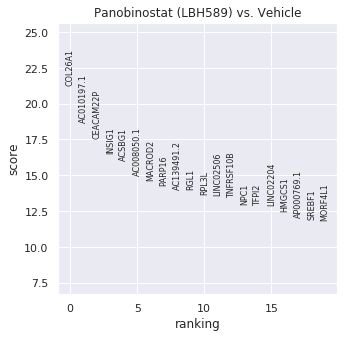

In [77]:
sc.pl.rank_genes_groups(cell_type_adata, key='rank_genes_groups', use_highly_variable=True)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA with n_comps = 50
    finished (0:00:01)


/home/icb/carlo.dedonno/anaconda3/envs/tf2/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/tf2/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:06)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:25)


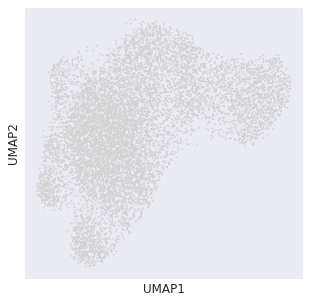

In [78]:
sc.pp.neighbors(cell_type_adata)
sc.tl.umap(cell_type_adata)
sc.pl.umap(cell_type_adata)

In [79]:
top_genes = cell_type_adata.uns['rank_genes_groups']['names'][to_condition]

reg_mean_top100: 0.5497675041825244
reg_mean_all: 0.7952605585240042


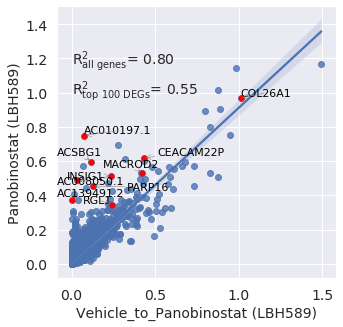

In [80]:
trvae.pl.reg_mean_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:10],
                         condition_key=condition_key,
                         axis_keys={'x': path, 'y': to_condition},
                         labels={'x': path, 'y': to_condition},
                         path_to_save=None,
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

computing PCA with n_comps = 50
    finished (0:00:00)


... storing 'batch' as categorical
... storing 'cell_type' as categorical
... storing 'dose_character' as categorical
... storing 'pathway' as categorical
... storing 'pathway_level_1' as categorical
... storing 'pathway_level_2' as categorical
... storing 'product_dose' as categorical
... storing 'product_name' as categorical
... storing 'target' as categorical
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which 

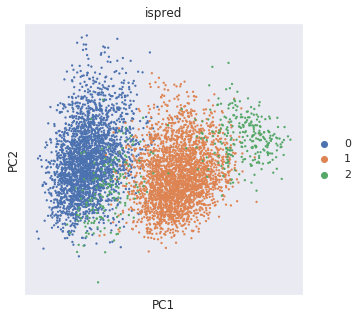

In [81]:
sc.pp.pca(adata_pred)
sc.pl.pca(adata_pred, color='ispred')

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


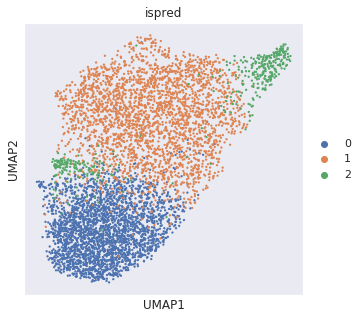

In [83]:
sc.pp.neighbors(adata_pred)
sc.tl.umap(adata_pred)
sc.pl.umap(adata_pred, color='ispred')

In [ ]:
adata_pred.obs['ispred']